In [26]:
import gdown
file_id = "1evRFGf9fEhKI8uR_kwWaqhMHk04HaMh4"
output_path = "D:/My projects/Loan Approval Prediction/data/raw/Load_Approval_Prediction.csv"
gdown.download(f"https://drive.google.com/uc?id={file_id}", output_path, quiet=False)



Downloading...
From: https://drive.google.com/uc?id=1evRFGf9fEhKI8uR_kwWaqhMHk04HaMh4
To: D:\My projects\Loan Approval Prediction\data\raw\Load_Approval_Prediction.csv
100%|██████████| 384k/384k [00:00<00:00, 1.44MB/s]


'D:/My projects/Loan Approval Prediction/data/raw/Load_Approval_Prediction.csv'

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import mlflow
import mlflow.sklearn
import seaborn as sns
import matplotlib.pyplot as plt


In [28]:
data=pd.read_csv("D:/My projects/Loan Approval Prediction/data/raw/Load_Approval_Prediction.csv")

In [29]:
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [31]:
data.sample(5)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
2440,2441,4,Graduate,No,7600000,29800000,20,361,13800000,5800000,15300000,5900000,Rejected
1728,1729,3,Not Graduate,Yes,700000,1600000,18,303,600000,500000,2000000,600000,Rejected
527,528,1,Not Graduate,Yes,2100000,4900000,10,744,200000,2000000,5400000,1000000,Approved
1484,1485,0,Not Graduate,Yes,5400000,10900000,20,366,3700000,500000,21000000,4800000,Rejected
1054,1055,5,Not Graduate,No,6500000,21600000,10,419,1600000,10900000,22300000,6600000,Rejected


In [32]:
print(data.columns)

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')


In [33]:
data['cibil_score']

0       778
1       417
2       506
3       467
4       382
       ... 
4264    317
4265    559
4266    457
4267    780
4268    607
Name: cibil_score, Length: 4269, dtype: int64

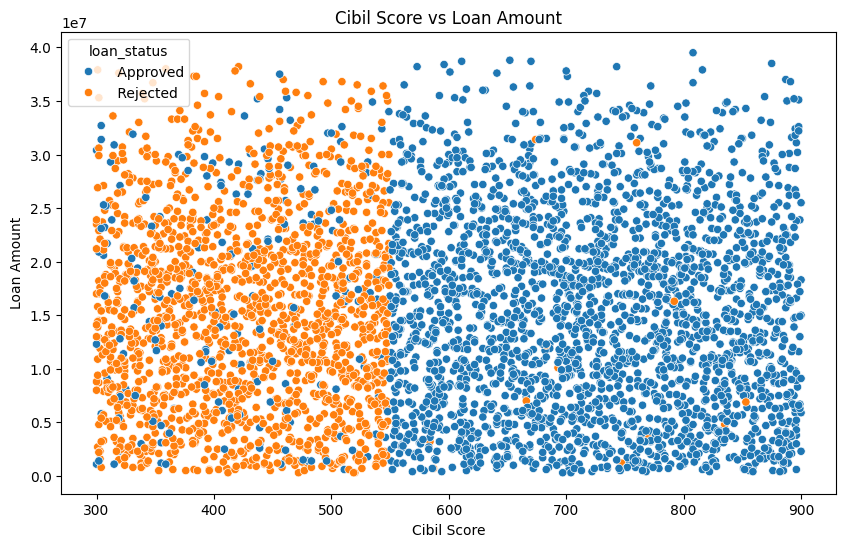

In [34]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='cibil_score', y='loan_amount', hue='loan_status')
plt.title('Cibil Score vs Loan Amount')
plt.xlabel('Cibil Score')
plt.ylabel('Loan Amount')
plt.show()


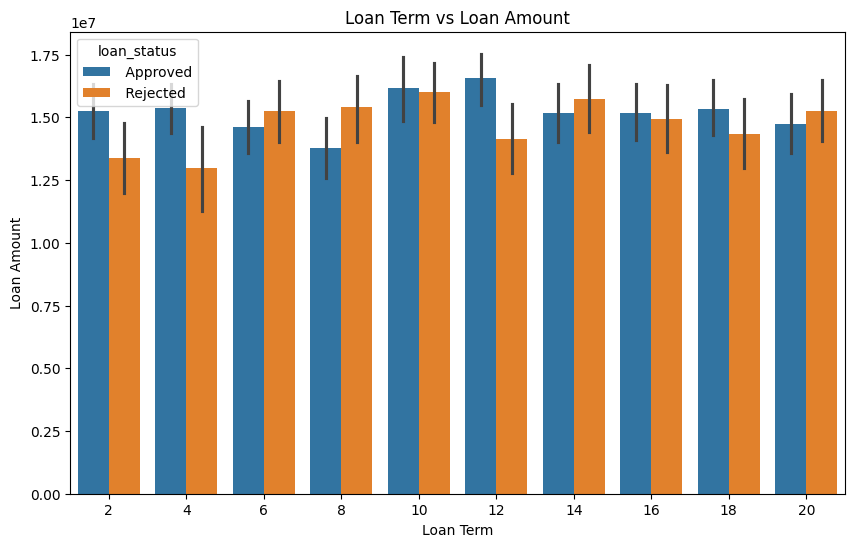

In [35]:
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='loan_term', y='loan_amount', hue='loan_status')
plt.title('Loan Term vs Loan Amount')
plt.xlabel('Loan Term')
plt.ylabel('Loan Amount')
plt.show()


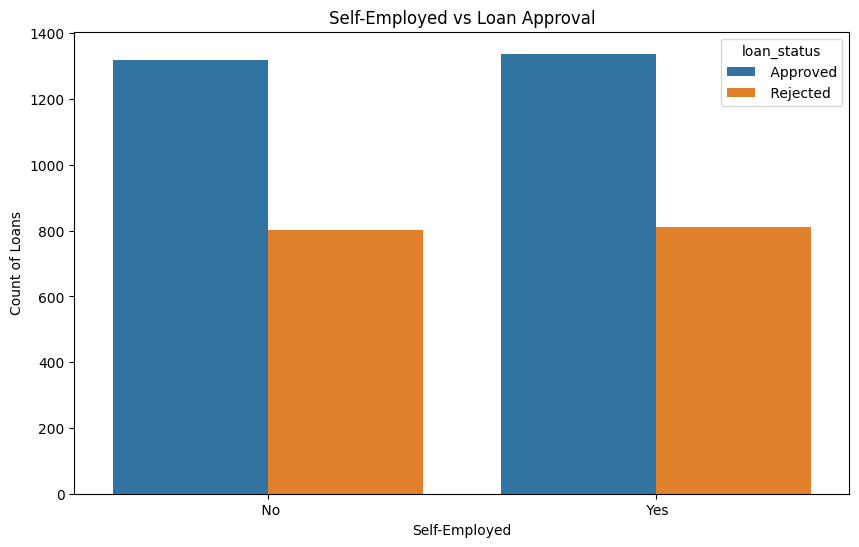

In [36]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='self_employed', hue='loan_status')
plt.title('Self-Employed vs Loan Approval')
plt.xlabel('Self-Employed')
plt.ylabel('Count of Loans')
plt.show()


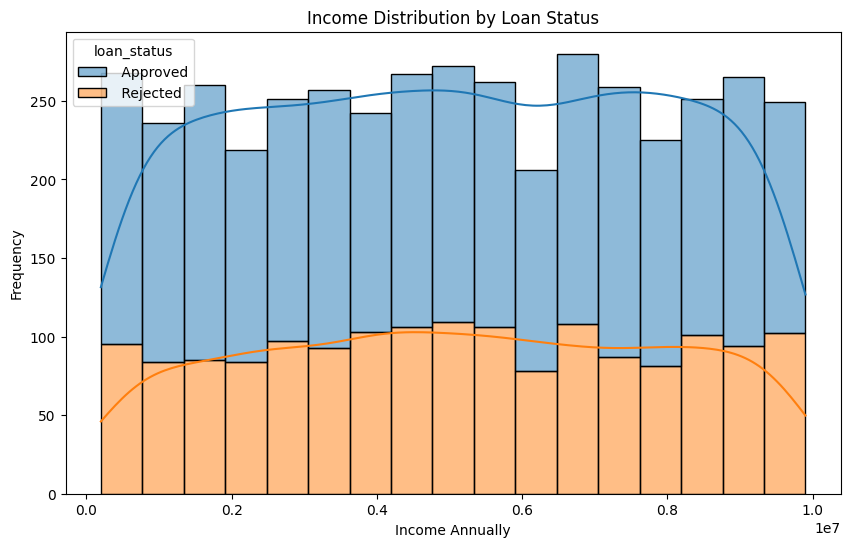

In [37]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='income_annum', hue='loan_status', kde=True, multiple="stack")
plt.title('Income Distribution by Loan Status')
plt.xlabel('Income Annually')
plt.ylabel('Frequency')
plt.show()


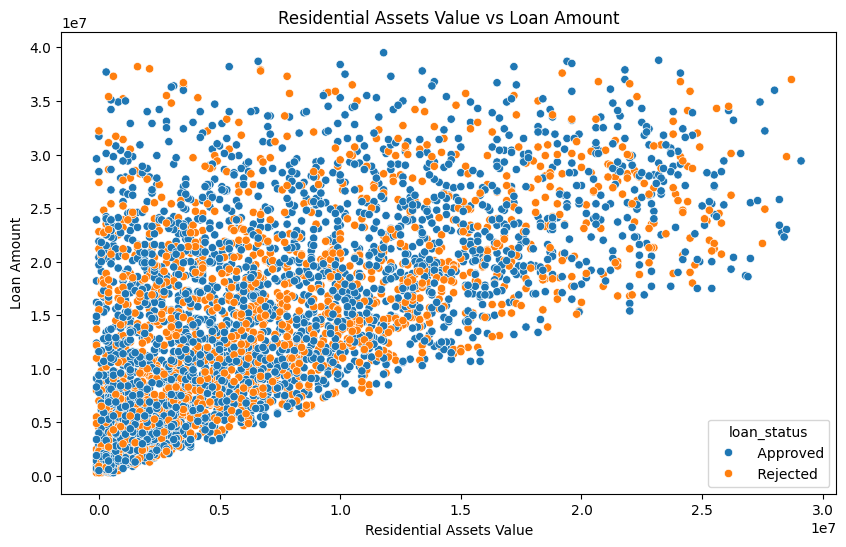

In [38]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='residential_assets_value', y='loan_amount', hue='loan_status')
plt.title('Residential Assets Value vs Loan Amount')
plt.xlabel('Residential Assets Value')
plt.ylabel('Loan Amount')
plt.show()


In [39]:
data['total_assets'] = data['residential_assets_value'] + data['commercial_assets_value'] + data['luxury_assets_value']
data = data.drop(columns=['residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'loan_id'])


In [41]:
data

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,bank_asset_value,loan_status,total_assets
0,2,Graduate,No,9600000,29900000,12,778,8000000,Approved,42700000
1,0,Not Graduate,Yes,4100000,12200000,8,417,3300000,Rejected,13700000
2,3,Graduate,No,9100000,29700000,20,506,12800000,Rejected,44900000
3,3,Graduate,No,8200000,30700000,8,467,7900000,Rejected,44800000
4,5,Not Graduate,Yes,9800000,24200000,20,382,5000000,Rejected,50000000
...,...,...,...,...,...,...,...,...,...,...
4264,5,Graduate,Yes,1000000,2300000,12,317,800000,Rejected,6600000
4265,0,Not Graduate,Yes,3300000,11300000,20,559,1900000,Approved,18100000
4266,2,Not Graduate,No,6500000,23900000,18,457,7300000,Rejected,31700000
4267,1,Not Graduate,No,4100000,12800000,8,780,5800000,Approved,23000000


In [42]:
label_encoders = {}
for column in ['education', 'self_employed', 'loan_status']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le


X = data.drop(['loan_status'], axis=1)
y = data['loan_status']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [43]:
data

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,bank_asset_value,loan_status,total_assets
0,2,0,0,9600000,29900000,12,778,8000000,0,42700000
1,0,1,1,4100000,12200000,8,417,3300000,1,13700000
2,3,0,0,9100000,29700000,20,506,12800000,1,44900000
3,3,0,0,8200000,30700000,8,467,7900000,1,44800000
4,5,1,1,9800000,24200000,20,382,5000000,1,50000000
...,...,...,...,...,...,...,...,...,...,...
4264,5,0,1,1000000,2300000,12,317,800000,1,6600000
4265,0,1,1,3300000,11300000,20,559,1900000,0,18100000
4266,2,1,0,6500000,23900000,18,457,7300000,1,31700000
4267,1,1,0,4100000,12800000,8,780,5800000,0,23000000


In [ ]:
import mlflow
import mlflow.sklearn
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss, precision_score, recall_score, f1_score
import logging
import joblib


logger = logging.getLogger(__name__)
logging.basicConfig(level=logging.INFO)

mlflow.end_run()

mlflow.set_experiment('Loan_Approval_Prediction')

with mlflow.start_run():  

    model = LogisticRegression()
    model.fit(X_train, y_train)

    mlflow.log_param('model_type', 'LogisticRegression')

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    logloss = log_loss(y_test, model.predict_proba(X_test))
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    mlflow.log_metric('accuracy', accuracy)
    mlflow.log_metric('log_loss', logloss)
    mlflow.log_metric('precision', precision)
    mlflow.log_metric('recall', recall)
    mlflow.log_metric('f1_score', f1)

    mlflow.sklearn.log_model(model, 'Loan_Approval_Prediction')

    logger.info(f"Model trained: Accuracy = {accuracy}, Log Loss = {logloss}, Precision = {precision}, Recall = {recall}, F1 Score = {f1}")

    joblib.dump(model, 'D:/My projects/Loan Approval Prediction/model/loan_approval_model.pkl')
mlflow.end_run()


2025/01/08 18:17:56 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
INFO:__main__:Model trained: Accuracy = 0.905152224824356, Log Loss = 0.22661099470896137, Precision = 0.8785942492012779, Recall = 0.8647798742138365, F1 Score = 0.8716323296354992
